In [1]:
V = {'L1' : 0.0, 'L2' : 0.0}
new_V = V.copy() # V의 복사본

for _ in range(100):
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    V = new_V.copy()
    print(V)

{'L1': 0.0, 'L2': -0.5}
{'L1': -0.22499999999999998, 'L2': -0.725}
{'L1': -0.42749999999999994, 'L2': -0.9274999999999999}
{'L1': -0.6097499999999999, 'L2': -1.10975}
{'L1': -0.7737750000000001, 'L2': -1.273775}
{'L1': -0.9213975000000002, 'L2': -1.4213975}
{'L1': -1.05425775, 'L2': -1.55425775}
{'L1': -1.1738319750000001, 'L2': -1.6738319750000001}
{'L1': -1.2814487775, 'L2': -1.7814487775}
{'L1': -1.3783038997500001, 'L2': -1.8783038997500001}
{'L1': -1.4654735097750002, 'L2': -1.965473509775}
{'L1': -1.5439261587975002, 'L2': -2.0439261587975004}
{'L1': -1.61453354291775, 'L2': -2.11453354291775}
{'L1': -1.6780801886259753, 'L2': -2.1780801886259753}
{'L1': -1.735272169763378, 'L2': -2.2352721697633777}
{'L1': -1.7867449527870403, 'L2': -2.28674495278704}
{'L1': -1.833070457508336, 'L2': -2.3330704575083363}
{'L1': -1.8747634117575025, 'L2': -2.3747634117575025}
{'L1': -1.9122870705817523, 'L2': -2.412287070581752}
{'L1': -1.9460583635235769, 'L2': -2.446058363523577}
{'L1': -1.9764

In [2]:
V = {'L1' : 0.0, 'L2' : 0.0}
new_V = V.copy() # V의 복사본

cnt = 0 # 갱신 횟수 기록
while True:
        
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    
    # 갱신된 양의 최댓값
    delta = abs(new_V['L1']-V['L1'])
    delta = max(delta, abs(new_V['L2']-V['L2']))
    
    V = new_V.copy()
    
    cnt += 1
    if delta < 0.0001: # 임계값
        print(V)
        print('갱신 횟수: ', cnt)
        break

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
갱신 횟수:  76


In [3]:
# 딕셔너리V 하나만 사용, 덮어쓰기 방식
V = {'L1' : 0.0, 'L2' : 0.0}

cnt = 0 # 갱신 횟수 기록
while True:
        
    t = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    delta = abs(t - V['L1'])
    V['L1'] = t
    
    t = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    delta = max(delta, abs(t - V['L2']))
    V['L2'] = t
    
    cnt += 1
    if delta < 0.0001: # 임계값
        print(V)
        print('갱신 횟수: ', cnt)
        break

{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
갱신 횟수:  60


In [5]:
import numpy as np

class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3] # 행동 공간(가능한 행동들)
        self.action_meaning = { # 행동의 의미
            0 : 'UP',
            1 : 'DOWN',
            2 : 'LEFT',
            3 : 'RIGHT',
        }
        
        self.reward_map = np.array( # 보상 맵(각 좌표의 보상값)
            [[0, 0, 0, 1.0],
             [0, None, 0, -1.0],
             [0, 0, 0, 0]]
        )
        
        self.goal_state = (0, 3) # 목표 상태(좌표)
        self.wall_state = (1, 1) # 벽 상태(좌표)
        self.start_state = (2, 0) # 시작 상태(좌표)
        self.agent_state = self.start_state # 에이전트 초기 상태(좌표)
    
    def next_state(self, state, action):
        # 이동 위치 계산
        action_move_map = [(-1,0), (1,0), (0, -1), (0,1)]
        move = action_move_map[action]
        next_state = (state[0] + move[0], state[1] + move[1])
        ny, nx = next_state
        
        # 이동한 위치가 그리드 월드의 테두리 밖이냐 벽인가?
        if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:
            next_state = state
        elif next_state == self.wall_state:
            next_state = state
        
        # 다음 상태 반환
        return next_state
    
    def reward(self, state, action, next_state):
        return self.reward_map[next_state]
        
        
    @property # 해당 메서드를 인스턴스 변수처럼 사용가능
    def height(self):
        return len(self.reward_map)

    @property
    def width(self):
        return len(self.reward_map[0])

    @property
    def shape(self):
        return self.reward_map.shape


    def actions(self):
        return self.action_space # [0, 1, 2, 3]


    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield (h, w) # return 과 같이 반환, 다른 일 처리 후 다시 반복 실행
                

In [6]:
env = GridWorld()

# env.height() 대신 env.height로 사용 가능 
print(env.height) # 3
print(env.width) # 4
print(env.shape) # (3, 4)

3
4
(3, 4)


In [7]:
for action in env.actions(): # 모든 행동에 순차적으로 접근
    print(action)
    
print('===')

for state in env.states(): # 모든 상태에 순차적으로 접근
    print(state)

0
1
2
3
===
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


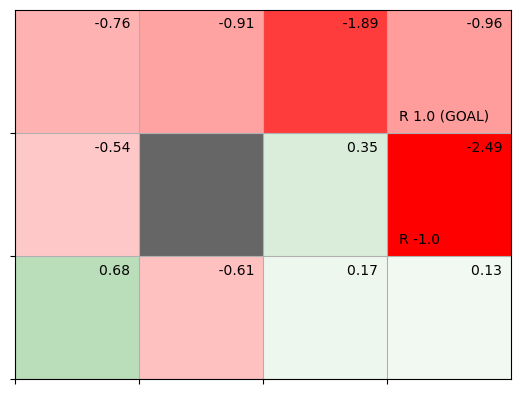

In [9]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import numpy as np
from common.gridworld import GridWorld

env = GridWorld()
V = {}
for state in env.states():
    V[state] = np.random.randn()  # 더미 상태 가치 함수
env.render_v(V)


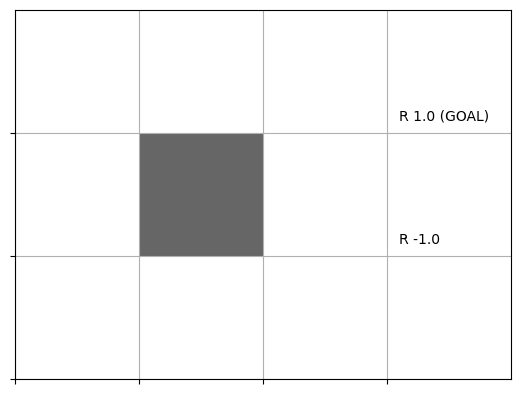

In [10]:
env = GridWorld()
env.render_v()

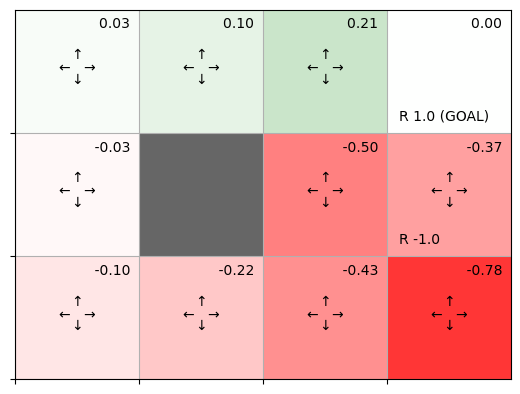

In [11]:
# policy_eval.py

if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
from collections import defaultdict
from common.gridworld import GridWorld


def eval_onestep(pi, V, env, gamma=0.9):
    for state in env.states():  # 각 상태에 접근
        if state == env.goal_state:  # ❷ 목표 상태에서의 가치 함수는 항상 0
            V[state] = 0
            continue

        action_probs = pi[state]
        new_V = 0

        # 각 행동에 접근        
        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            # 새로운 가치 함수
            new_V += action_prob * (r + gamma * V[next_state])

        V[state] = new_V
    return V


def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True:
        old_V = V.copy()  # 갱신 전 가치 함수
        V = eval_onestep(pi, V, env, gamma)

        # 갱신된 양의 최댓값 계산
        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t

        # 임계값과 비교
        if delta < threshold:
            break
    return V


if __name__ == '__main__':
    env = GridWorld()
    gamma = 0.9  # 할인율

    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})  # 정책
    V = defaultdict(lambda: 0)  # 가치 함수

    V = policy_eval(pi, V, env, gamma)  # 정책 평가

    # [그림 4-13] 무작위 정책의 가치 함수
    env.render_v(V, pi)



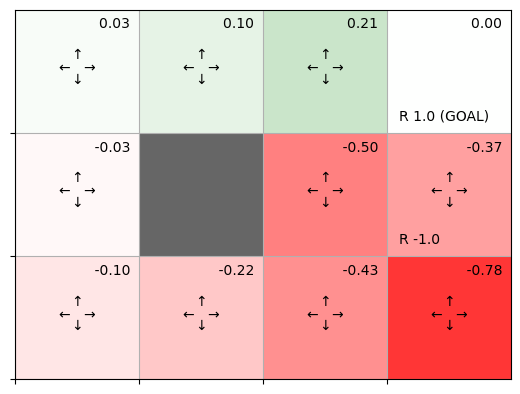

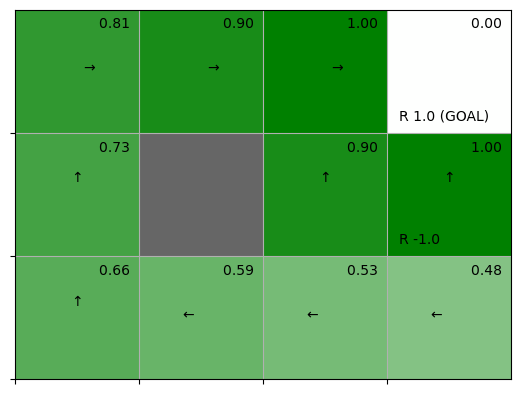

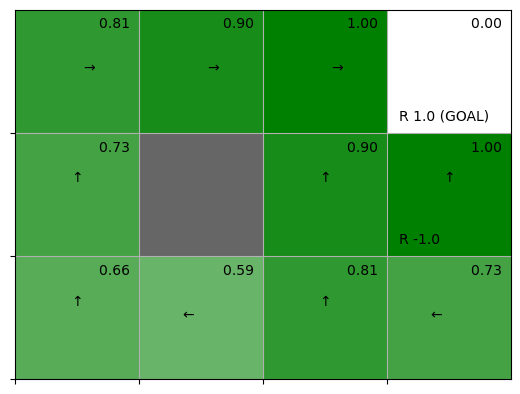

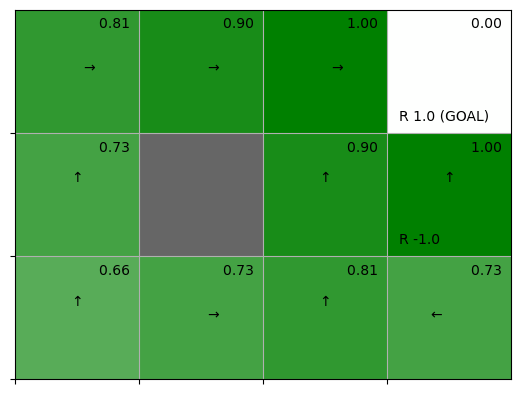

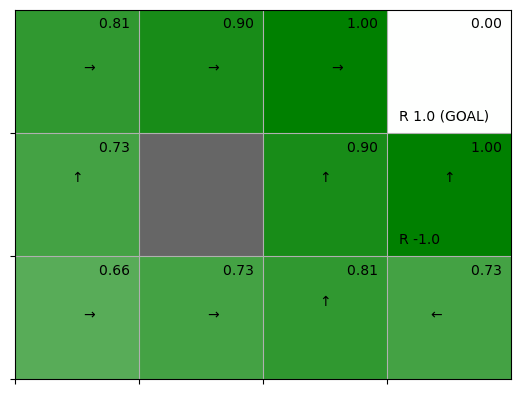

In [13]:
# policy_iter.py

if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
from collections import defaultdict
from common.gridworld import GridWorld
from ch04.policy_eval import policy_eval


def argmax(d):
    """d (dict)"""
    max_value = max(d.values())
    max_key = -1 #0?
    for key, value in d.items():
        if value == max_value:
            max_key = key
    return max_key


def greedy_policy(V, env, gamma):
    pi = {}

    for state in env.states():
        action_values = {}

        for action in env.actions():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]
            action_values[action] = value

        max_action = argmax(action_values)
        action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
        action_probs[max_action] = 1.0
        pi[state] = action_probs
    return pi


def policy_iter(env, gamma, threshold=0.001, is_render=True):
    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
    V = defaultdict(lambda: 0)

    while True:
        V = policy_eval(pi, V, env, gamma, threshold)  # 평가
        new_pi = greedy_policy(V, env, gamma)          # 개선

        if is_render:
            env.render_v(V, pi)

        if new_pi == pi:  # 갱신 여부 확인
            break
        pi = new_pi

    return pi


# 가치 함수와 정책 시각화(책의 [그림 4-16]은 처음과 마지막 그래프만 표시했음)
if __name__ == '__main__':
    env = GridWorld()
    gamma = 0.9
    pi = policy_iter(env, gamma)


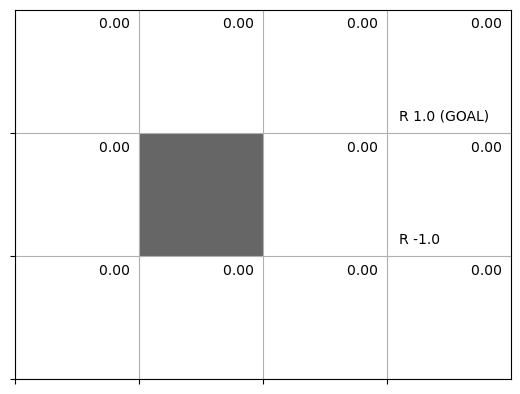

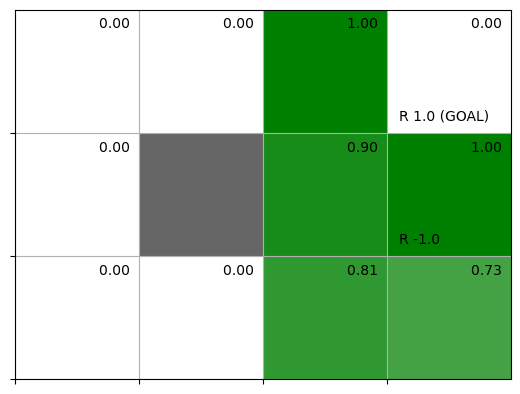

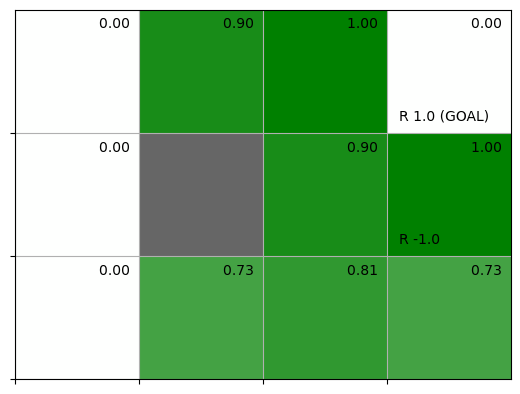

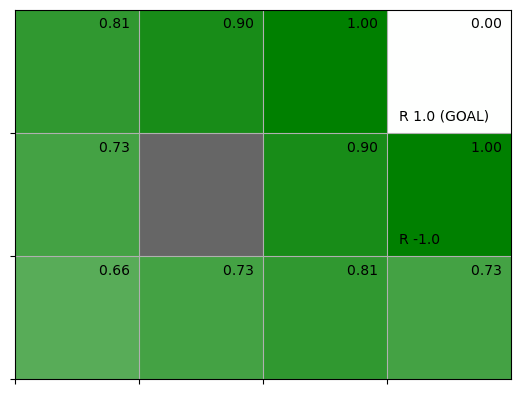

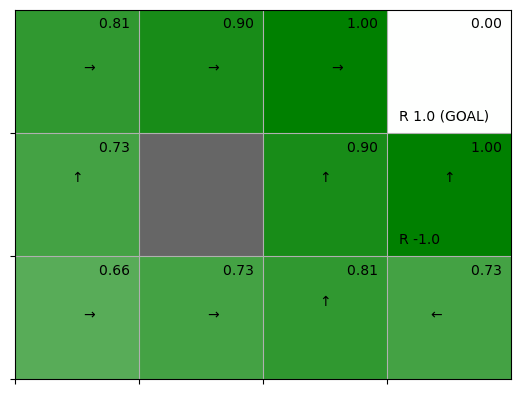

In [14]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
from collections import defaultdict
from common.gridworld import GridWorld
from ch04.policy_iter import greedy_policy


def value_iter_onestep(V, env, gamma):
    for state in env.states():       # 모든 상태에 차례로 접근
        if state == env.goal_state:  # 목표 상태에서의 가치 함수는 항상 0
            V[state] = 0
            continue

        action_values = []
        for action in env.actions():  # 모든 행동에 차례로 접근
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]  # 새로운 가치 함수
            action_values.append(value)

        V[state] = max(action_values)  # 최댓값 추출
    return V


def value_iter(V, env, gamma, threshold=0.001, is_render=True):
    while True:
        if is_render:
            env.render_v(V)

        old_V = V.copy()  # 갱신 전 가치 함수
        V = value_iter_onestep(V, env, gamma)

        # 갱신된 양의 최댓값 구하기
        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t

        # 임계값과 비교
        if delta < threshold:
            break
    return V


# [그림 4-24] 및 [그림 4-25]
if __name__ == '__main__':
    V = defaultdict(lambda: 0)
    env = GridWorld()
    gamma = 0.9

    V = value_iter(V, env, gamma)  # 최적 가치 함수 찾기

    pi = greedy_policy(V, env, gamma)  # 최적 정책 찾기
    env.render_v(V, pi)
